## Machine Learning
### Gradient Descent for Linear and Ridge Regression
In **Gradient Descent**, we move in the negative of gradient of the loss function in order to find the parameters that make the loss minimum. So, if the loss function is $L(\boldsymbol{w})$, then we update the parameter vector $\boldsymbol{w}$ by:
<br>$\boldsymbol{w}\leftarrow \boldsymbol{w}-\eta_k\nabla L(\boldsymbol{w})$
<br> where $\eta_k>0$ is the **learning rate** (also called *step size*) at time step $k$.
<br>In **Ridge regression**, we saw that we use the following loss function in which $\frac{1}{2}$ is applied to make the fomulas simpler:
<br>$L_{Ridge}(\boldsymbol{w})=\frac{1}{2}||\boldsymbol{y}-X\boldsymbol{w}||^2+\frac{\lambda}{2} ||\boldsymbol{w}||^2$
<br>If we set $\lambda$ to zero, we get to the **linear regression**. Now, we compute $\nabla L(\boldsymbol{w})$ by:
<br>$\nabla L(\boldsymbol{w})=-X^T(\boldsymbol{y}-X\boldsymbol{w})+\lambda \boldsymbol{w}$
<br> **Reminder:** We have data points $(\boldsymbol{x}_i,y_i)$ where the first components of $\boldsymbol{x}_i$ are one. Thus, the rows of matrix $X$ are composed of $\boldsymbol{x}^T_i$ such that the first column of $X$ is all one. Vectors denoted by bold symbols here are all column vectors.
<br>In the following, 
 - Gradient Descent (GD) for linear regression is implemented and tested for noisy data points of a line. 
 - Then, Gradient Descent is implemented for ridge regression over noisy data points of a quadratic curve.

<hr>
The Python code at: https://github.com/ostad-ai/Machine-Learning
<br> Explanation: https://www.pinterest.com/HamedShahHosseini/Machine-Learning/

In [1]:
# importing required modules
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Gradient Descent for linear Regression
# Xs is a matrix with n rows and p-1 columns
# ys is a column vector of size n holding the dependent values yi
# etta is the learning for gradient descent
def batchGD_LR(Xs,ys,iter=100,etta=.01):
    X=np.ones((Xs.shape[0],Xs.shape[1]+1))
    X[:,1:]=Xs.copy()
    w=np.random.rand(X.shape[1]).reshape(-1,1)
    for k in range(iter):
        w+=etta*X.T@(ys.reshape(-1,1)-X@w)
    return w.flatten()

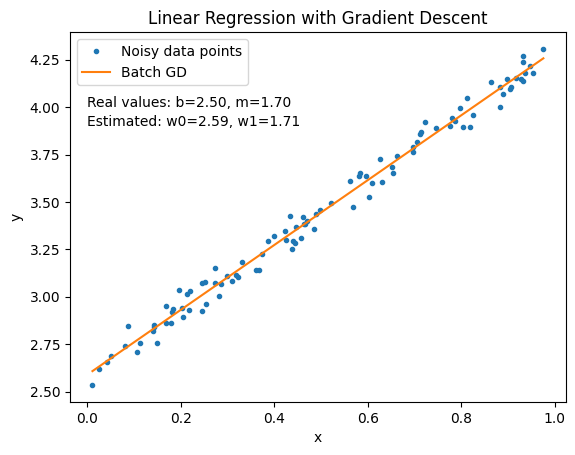

In [3]:
# example of Gradient Descent (GD) for linear Regression
m,b,noise,Ndata,p=1.7,2.5,.2,100,2
xs=np.random.rand(Ndata)
Xs=xs.reshape(len(xs),p-1)
ys=m*xs+b+noise*np.random.rand(Ndata)
b_hat,m_hat=batchGD_LR(Xs,ys)
xss=np.sort(xs)
ys_hat=b_hat+m_hat*xss
plt.plot(xs,ys,'.',label='Noisy data points')
plt.plot(xss,ys_hat,'-',label='Batch GD')
plt.xlabel('x'); plt.ylabel('y'); plt.legend()
plt.title('Linear Regression with Gradient Descent')
plt.text(0,4.,f'Real values: b={b:.2f}, m={m:.2f}')
plt.text(0,3.9,f'Estimated: w0={b_hat:.2f}, w1={m_hat:.2f}')
plt.show()

Now, we use Gradient Descent for Ridge Regression.

In [4]:
# Gradient Descent (GD) for Ridge Regression
# Xs is a matrix with n rows and p-1 columns
# ys is a column vector of size n holding the dependent values yi
# etta is the learning for gradient descent
# landa is the ridge (regularization) parameter
def batchGD_RR(Xs,ys,iter=100,etta=.01,landa=.1):
    X=np.ones((Xs.shape[0],Xs.shape[1]+1))
    X[:,1:]=Xs.copy()
    w=np.random.rand(X.shape[1]).reshape(-1,1)
    for k in range(iter):
        w+=etta*X.T@(ys.reshape(-1,1)-X@w)-etta*landa*w
    return w.flatten()

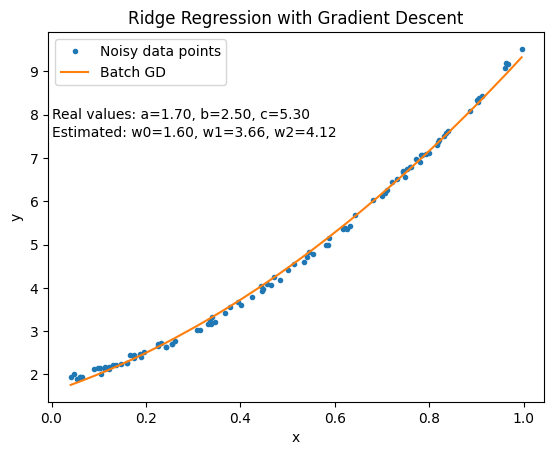

In [5]:
# example of GD for Ridge Regression
a,b,c,noise,Ndata,p=1.7,2.5,5.3,.2,100,3
xs=np.random.rand(Ndata)
Xs=np.zeros((len(xs),p-1))
Xs[:,0]=xs.copy()
Xs[:,1]=Xs[:,0]**2
ys=a+b*xs+c*xs**2+noise*np.random.rand(Ndata)
a_hat,b_hat,c_hat=batchGD_RR(Xs,ys)
xss=np.sort(xs)
ys_hat=a_hat+b_hat*xss+c_hat*xss**2
plt.plot(xs,ys,'.',label='Noisy data points')
plt.plot(xss,ys_hat,'-',label='Batch GD')
plt.xlabel('x'); plt.ylabel('y'); plt.legend()
plt.title('Ridge Regression with Gradient Descent')
plt.text(0,7.9,f'Real values: a={a:.2f}, b={b:.2f}, c={c:.2f}')
plt.text(0,7.5,f'Estimated: w0={a_hat:.2f}, w1={b_hat:.2f}, w2={c_hat:.2f}')
plt.show()